#Setting up the Environment


In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../sample_data"))
# Any results you write to the current directory are saved as output.

#Loading data

In [68]:
train=pd.read_csv('../content/sample_data/train[1].csv')#/content/sample_data/train[1].csv
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
test=pd.read_csv('../content/sample_data/test[1].csv')#/content/sample_data/test[1].csv
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Data Manipulation and Analysis

**encoding object data types to category and further into int data types**

In [70]:
train.Sex=train.Sex.astype('category').cat.codes
test.Sex=test.Sex.astype('category').cat.codes

In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
train.describe()#describe gives the count,mean,standard deviation ,minimum of the given data.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


**hot encoding category variables here**

In [73]:
train_df=train.copy()
test_df=test.copy()
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)

In [74]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
train_df.info()
print(test_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int8   
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Pclass_2     891 non-null    uint8  
 13  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB
   PassengerId  ... Pclass_3
0          892  ...        1
1          893  ...        1
2          894  ...        0
3          895  ...      

**computing mean age for both the test and train dataset and imputing the mean age wherever NaN value exists**

In [76]:
age_mean=train_df.Age.mean()
#gives the mean value of the age column in the data set

In [77]:

train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

In [78]:
train_df.head(10)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,0,1
5,6,0,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,1,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0,1,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,1,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,0,1,0


In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
 12  Pclass_2     891 non-null    uint8  
 13  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB


In [80]:
age_mean_test=test_df['Age'].mean()
print(age_mean_test)
#test_df['Age'].fillna(age_mean_test,inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

30.272590361445783


In [81]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [82]:
#test_df.Cabin.unique()

In [83]:
test_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [84]:
train_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [85]:
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Sex  ...  Embarked_S  Pclass_2  Pclass_3
0              1         0    1  ...           1         0         1
1              2         1    0  ...           0         0         0
2              3         1    0  ...           1         0         1
3              4         1    0  ...           1         0         0
4              5         0    1  ...           1         0         1
..           ...       ...  ...  ...         ...       ...       ...
886          887         0    1  ...           1         1         0
887          888         1    0  ...           1         0         0
888          889         0    0  ...           1         0         1
889          890         1    1  ...           0         0         0
890          891         0    1  ...           0         0         1

[891 rows x 11 columns]>

#Data Visualization

In [86]:
corr=train_df.corr(method='pearson')#Gives the correlation co-efficient using pearson method
corr

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.033606,0.022148,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.155660,0.093349,-0.322308
Sex,0.042939,-0.543351,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.074115,0.125722,-0.064746,0.137143
Age,0.034212,-0.064910,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.014665,0.015831,-0.291955
SibSp,-0.057527,-0.035322,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.070941,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.063036,-0.000734,0.015790
Fare,0.012658,0.257307,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.166603,-0.118557,-0.413333
Embarked_Q,-0.033606,0.003650,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.496624,-0.127301,0.237449
Embarked_S,0.022148,-0.155660,0.125722,-0.014665,0.070941,0.063036,-0.166603,-0.496624,1.000000,0.192061,-0.009511
Pclass_2,-0.000086,0.093349,-0.064746,0.015831,-0.055932,-0.000734,-0.118557,-0.127301,0.192061,1.000000,-0.565210


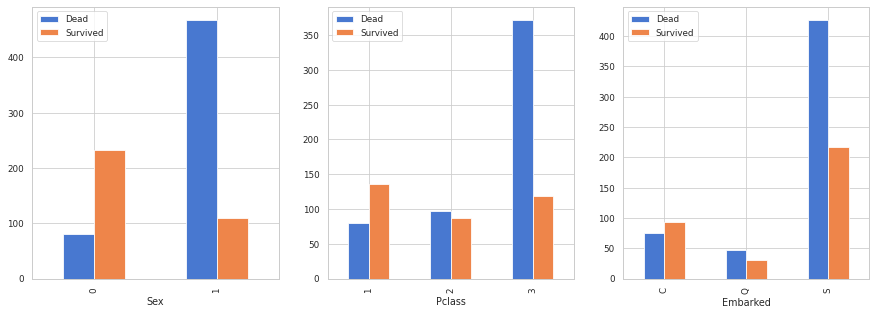

In [87]:
import matplotlib.pyplot as plt# Visualizing the columns using the double barplots of matplotlib method between Pclass and survived
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
cat_columns = ['Sex','Pclass','Embarked']
for i in range(len(cat_columns)):
    curr_feature = cat_columns[i]
    train.groupby([curr_feature, 'Survived'])['PassengerId'].count().unstack().plot(kind = 'bar', stacked = False, ax = axes[i])
    axes[i].legend(['Dead','Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


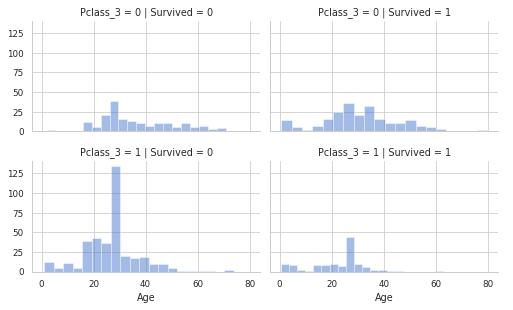

In [88]:
import seaborn as sns#To get the histogram visualization of data frame between Pclass_3,Survived and Age.
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass_3', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

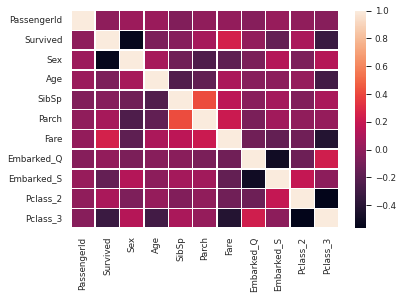

In [89]:
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.heatmap(corr,linewidths=.5)

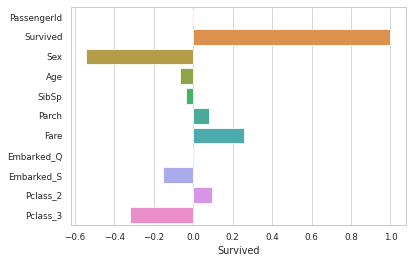

In [90]:
sns.barplot(x=corr.Survived,y=corr.columns)

In [91]:
#import sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
logReg=LogisticRegression(solver='liblinear')
sgdcls=SGDClassifier()
nbcls=GaussianNB()
knn=KNeighborsClassifier()
desclr=DecisionTreeClassifier()
svc=SVC()
ada=AdaBoostClassifier()

#Data Preparation

In [92]:
X=train_df.drop('Survived',axis=1)#Splitting the data set to train and test.
y=train_df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_df_test, y_train, y_df_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Training and testing multiple ML models

In [93]:
logReg.fit(X_train,y_train)#Predicting using logistic regression
prediction=logReg.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(logReg,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log = round(logReg.score(X_train,y_train) * 100, 2)
acc_log

Score: [0.8041958  0.82517483 0.79577465 0.74647887 0.83802817]


81.04

In [94]:
#SGDClassifier
sgdcls.fit(X_train,y_train)
prediction_sgdcls=sgdcls.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(sgdcls,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_sgdcls = round(sgdcls.score(X_train,y_train) * 100, 2)
acc_log_sgdcls

Score: [0.60839161 0.69230769 0.64788732 0.38732394 0.38732394]


37.78

In [95]:
nbcls.fit(X_train,y_train)#Naive Bayes Classification method used for prediction.
prediction_nbcls=nbcls.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(nbcls,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_nbcls = round(nbcls.score(X_train,y_train) * 100, 2)
acc_log_nbcls

Score: [0.78321678 0.81818182 0.81690141 0.73239437 0.76760563]


80.34

In [96]:
knn.fit(X_train,y_train)#Knn method is implemented here to predict.
prediction_knn=knn.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(knn,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_knn = round(knn.score(X_train,y_train) * 100, 2)
acc_log_knn

Score: [0.65734266 0.61538462 0.58450704 0.58450704 0.64788732]


75.14

In [97]:
#DecisionTreeClassifier
desclr.fit(X_train,y_train)
prediction_desclr=desclr.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(desclr,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_desclr = round(desclr.score(X_train,y_train) * 100, 2)
acc_log_desclr

Score: [0.75524476 0.73426573 0.71830986 0.75352113 0.72535211]


100.0

In [98]:
svc.fit(X_train,y_train)#Support Vector Classification
prediction_svc=svc.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(svc,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_svc = round(svc.score(X_train,y_train) * 100, 2)
acc_log_svc

Score: [0.65734266 0.64335664 0.66197183 0.62676056 0.64084507]


65.03

In [99]:
ada.fit(X_train,y_train)#ada boost classifier
prediction_svc=ada.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(ada,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_ada = round(ada.score(X_train,y_train) * 100, 2)
acc_log_ada

Score: [0.79020979 0.7972028  0.8028169  0.78873239 0.75352113]


83.85

In [100]:
prediction_test=logReg.predict(test_df)

#Fine Tuning

In [103]:
#x = train_df['PassengerId','Pclass','Sex','Age','Parch','Fare','Cabin','Embarked','PassengerType','FamilySize']
y_new = train_df['Survived']
X_new = train_df.drop('Survived', axis = 1)
X_new = train_df.drop('SibSp', axis = 1)

In [104]:
ada.fit(X_new,y_new)
prediction_svc=ada.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(ada,X_new,y_new,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_ada = round(ada.score(X_new,y_new) * 100, 2)
acc_log_ada

Score: [1. 1. 1. 1. 1.]


100.0